# AMME5710 Week 2 Tutorial

This activity is to be completed during the Week 2 tutorial. When you have completed the activity, you will need to show your results to the tutor who will check your work and that you have sufficiently completed the task: this needs to be completed during the tutorial time, so make sure you are ready to show the tutors your work during the last hour of the tutorial.

**Tutorial Objectives and Instructions**:
- This tutorial will introduce you to concepts in light, shading and colour in images, and explore algorithms for estimating shape from shading using photometric stereo, and detecting objects based on colour.
- You should step through the example code snippets which explain and demonstrate the use of relevant functions in OpenCV.
- At the end of the notebook, there are several activities/exercises you will need to complete yourself. You can choose to:
    - Complete these inside the tutorial Jupyter Notebook using python code blocks
    - Write your own python code/scripts to produce the results requested

At any time, you can review the OpenCV documentation [https://docs.opencv.org/4.9.0/index.html](https://docs.opencv.org/4.9.0/index.html)l


To run some of the examples in this notebook, you will need to download the data and images in **'yale_face_data.zip'** and **'example_images_wee2.zip'** on the Canvas page for Week 2 of the course.

In [70]:
# Import required modules
import cv2
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline 

## Shading in Images and Photometric Stereo
During the week 2 lecture, we discussed a method for estimating the 3D shape of the surface of an object from multiple images taken with varying light source directions (a method known as photometric stereo). Photometric stereo is typically performed as a two-stage process:

- Use images to estimate the surface normal vector direction for each pixel in an image
- Perform a 2D numeric integration across the surface normals to estimate the 3D height map of the surface

From the Canvas site, download and unzip the file 'week2_facedata.zip'. This contains several datasets that contain images of faces under controlled lighting, collected as part of the [Yale Face Database](http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/Yale%20Face%20Database.htm).

There are four sets of data for four different faces/subjects: each set is organised as follows:
- image_dir_B**XX**: directory containing 64 images of a single person’s face captured from a variety of lighting directions.
- light_dirB**XX**.pkl: a python pickle file containing a 64-by-3 numpy array of the lighting vector directions for each of the 64 photos. Each vector is in [X,Y,Z] order, where X points left to right horizontally in the image, Y point up to down vertically in the image and Z points normal to the image plane and positive into the image.

The code below illustrates how the data can be loaded into python:

lighting direction vectors shape: (64, 3)


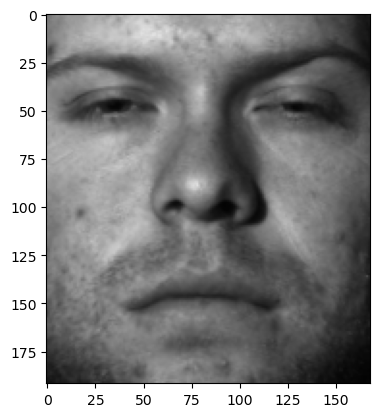

In [71]:
# Load-up an example image set (B1)
import pickle
import os

# Paths to data for dataset
img_dir_path = 'yale_face_data/image_dir_B01'
light_dirs_path = 'yale_face_data/light_dirB01.pkl'

# Load images of face
imgs = []
for i in range(64):
    imgs.append(cv2.imread(os.path.join(img_dir_path,'image_%03d.png'%(i))))

# Load lighting direction vectors
light_dirs = pickle.load( open( light_dirs_path, "rb" ) )

# Have a look at some data
print('lighting direction vectors shape:',light_dirs.shape)
plt.imshow(imgs[0]) # look at the first face image


Browse through a few of the images in the dataset. Each photo has been taken using a single, directional light source illuminating the subject’s face, some from slightly behind the subject. Notice the variations in shading, shadowing and reflection highlights visible.

Note: The images are captured in grayscale, but are stored in a PNG format which contains three colour channels. You can extract grayscale data from any of the three image channels (e.g. im[:,:,0]).


## Pre-reconstructed Albedo and Surface Normal Vectors
Load up the python pickle file 'B01_albedo_normals.pkl' which contains two numpy arrays corresponding to reconstructed data for the B01 face dataset. The data contains two variables:

- 'albedo_image': a 192-by-168 array of estimated albedo values for the subject’s face, scaled between 0 and 1.
- 'surface_normals': a 192-by-168-by-3 array corresponding to estimated surface normals for the subject’s face for every pixel. For example: 'surface_normals[5,5,:]' will return the 3x1 normal vector for pixel [5,5] in the image.

You can visualise the albedo and surface normal vector components using 'plt.imshow()':

Albedo Image shape: (192, 168)
Surface Normal Image shape: (192, 168, 3)


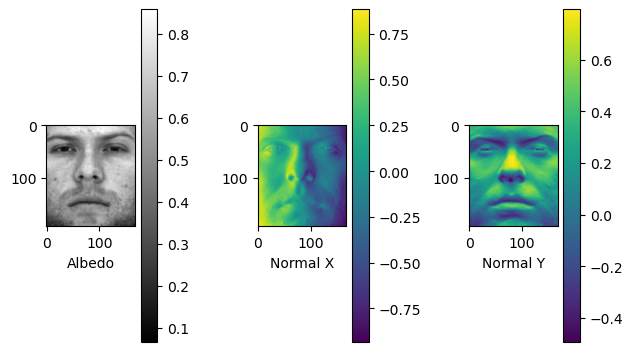

In [72]:
# Load up pre-reconstructed data for the first face dataset (B01)
B01_data_path = 'yale_face_data/B01_albedo_normals.pkl'
data = pickle.load( open( B01_data_path, "rb" ) )
albedo_image = data['albedo_image']
surface_normals = data['surface_normals']

print('Albedo Image shape:',albedo_image.shape)
print('Surface Normal Image shape:',surface_normals.shape)

# Show plot of albedo, surface normal x and surface normal y
plt.subplot(131)
plt.imshow(albedo_image, 'gray')
plt.colorbar()
plt.xlabel('Albedo')

plt.subplot(132)
plt.imshow(surface_normals[:,:,0])
plt.colorbar()
plt.xlabel('Normal X')

plt.subplot(133)
plt.imshow(surface_normals[:,:,1])
plt.colorbar()
plt.xlabel('Normal Y')

plt.tight_layout()


# Exercise/Activities to Complete
The following activities should be completed during the Friday tutorial and shown to your tutor to be marked off.


## Exercise 1: Image Shading
Assuming a Lambertian surface reflection model, the light received at a single pixel (x,y) in the image after being reflected from an object with albedo $\rho$ and with surface normal vector N, with light emitted from source vector S is: 

$I(x,y) = \rho(x,y)\mathbf{N}(x,y) \cdot \mathbf{S}$

For example, we can compute the expected image intensity in an 8-bit image of pixel [5,5] in the image when considering the light source corresponding to the first photo in our face dataset using:

```
I = albedo_image[5,5]*np.dot(surface_normals[5,5,:], light_dirs[0,:]);
```

which should provide an image intensity between 0 and 1. To compute the expected 8-bit pixel intensity we can rescale (I2 = (255*I).astype(np.uint8)).

- Using 'albedo_image', 'surface_normals' and 'light_dirs', render a series of images of the subject's face when exposed to each of the 64 light sources in 'light_dirs'. Plot your rendered images as a montage (as an 8-by-8 tiled image showing each of the 64 rendered images) and compare the rendered images against the actual face images. For example, a comparison for image index 10 should look something like this:

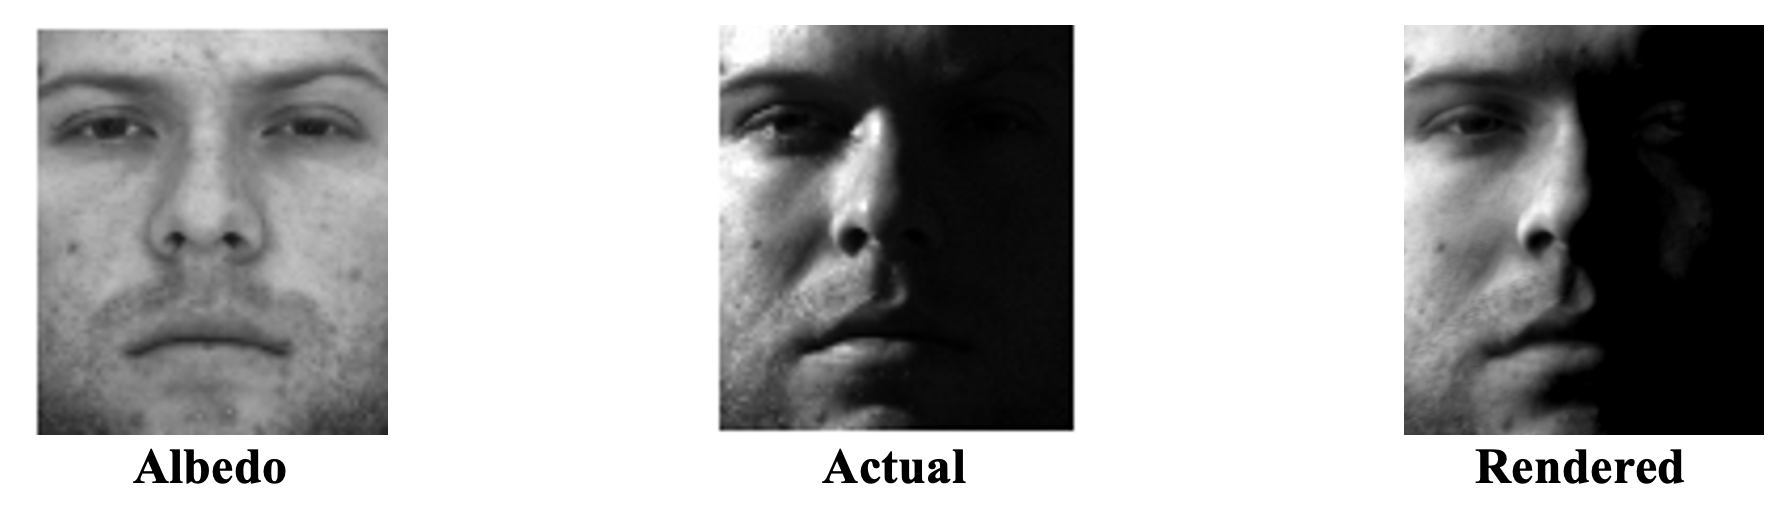

- Where do you notice differences and why? What are some of the reflectance and image formation effects not encompassed by your simple Lambertian shading model?


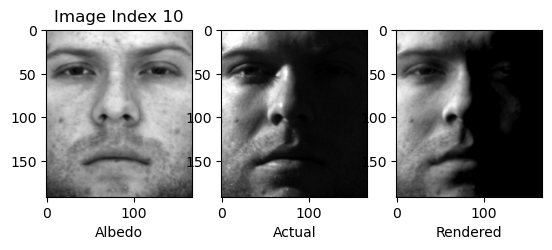

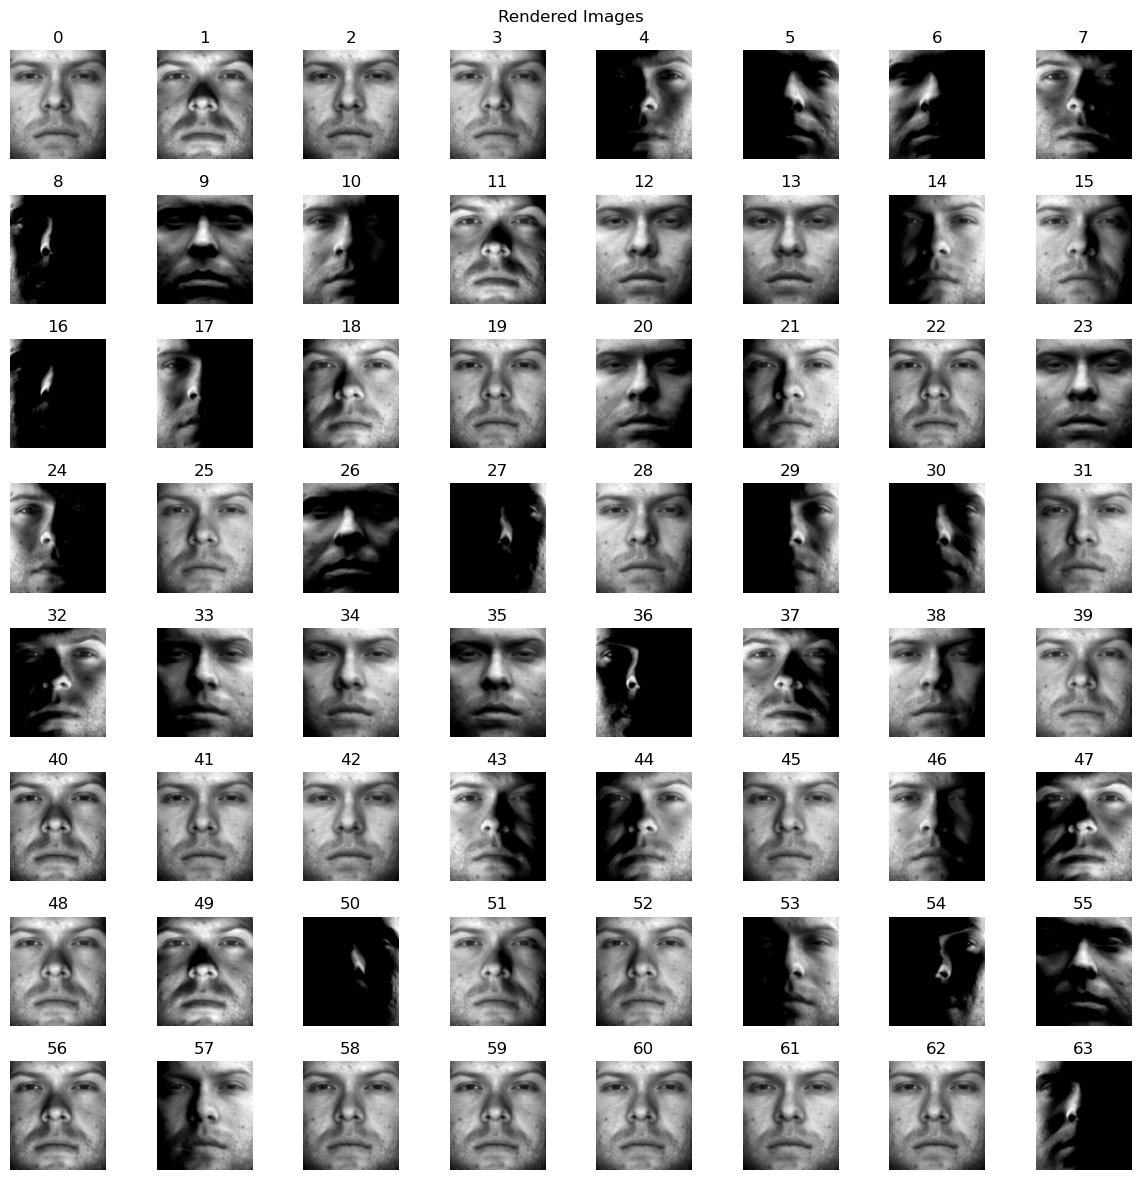

In [73]:
# Write your code here, or in a separate python script

def render_image(albedo, surface_normals, light_direction):
    # rendered = albedo*(np.dot(surface_normals, light_direction))
    # return rendered 
    light_direction = light_direction / np.linalg.norm(light_direction)
    rendered = albedo*(np.sum(surface_normals * light_direction[None, None, :], axis=2))
    rendered_clipped = np.clip(rendered,0, None)
    # return rendered
    return rendered_clipped


index = 10
total_images = 64
rendered_images = []

# PLOTTING INDIVIDUAL COMPARISON 
plt.subplot(131)
plt.imshow(albedo_image, 'gray')
plt.xlabel('Albedo')
plt.title(f'Image Index {index}')

plt.subplot(132)
plt.imshow(imgs[index])
plt.xlabel('Actual')

# RENDERED IMAGE 
plt.subplot(133)
rendered = render_image(albedo_image, surface_normals, light_dirs[index, :])
# rendered_images.append(rendered)
plt.imshow(rendered, 'gray')
plt.xlabel('Rendered')

# 8x8 RENDERED IMAGES
for i in range(total_images): 
    rendered = render_image(albedo_image, surface_normals, light_dirs[i, :])
    rendered_images.append(rendered)

fig, axes = plt.subplots(8, 8, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(rendered_images[i], cmap='gray')
    ax.set_title(f'{i}')
    ax.axis('off')
plt.suptitle("Rendered Images")
plt.tight_layout()
plt.show()




## Exercise 2: Photometric Stereo
There are three additional face datasets (B02, B05 and B07): the dataset contains images sets and associated lighting direction vectors for each of faces.

- Write python code that computes the albedo and normal vector direction of the imaged surface for each pixel location (x,y) in the image. Apply this algorithm to each of the face data sets.
- You will need to convert the image data to a floating point representation and scale to the range 0 to 1 before performing estimation. The images have been calibrated such that the image pixel brightness scales linearly with the radiance L of the incoming light.
- To compute the albedo and normal you will need to use a least squares solution of the imaging equation described in the week 2 lecture notes. You can perform this step using the numpy function 'np.linalg.lstsq(A, b)', which will produce a solution for the vector g(x,y) for each pixel which minimises the sum of squares of the residual error in rendered vs. measured light intensity.
- Display the recovered albedo as an image and display the surface normals X,Y components as described in a code cell above.

Assignment 1, Question 1 is a follow-on from this activity for which you will use your recovered normals to create a height map of each face.


lighting direction vectors shape: (64, 3)


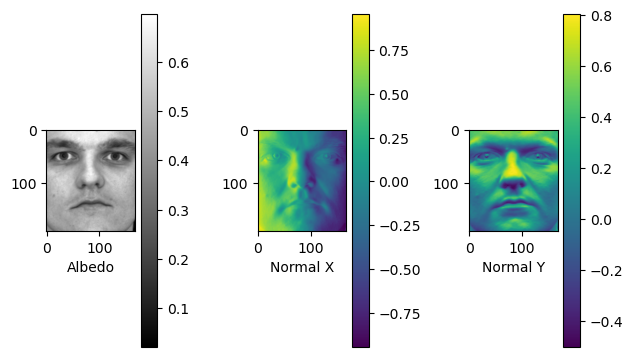

In [ ]:

def find_albedo_normals(image_path, light_directions_path):
    # Load images of face
    images = []
    for i in range(64):
        image = cv2.imread(os.path.join(image_path,'image_%03d.png'%(i)))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = gray.astype(np.float32) / 255.0
        images.append(gray)

    # Collate all the pixel data for each pixel from each light source 
    images = np.stack(images, axis=2)  

    # Load lighting direction vectors
    light_dir = pickle.load( open( light_directions_path, "rb" ) )
    print('lighting direction vectors shape:',light_dir.shape)

    # Image dimesnions
    height, width, num_images = images.shape
    plt.imshow(cv2.cvtColor(images[:, :, 0], cv2.COLOR_BGR2RGB)) # look at the first face image


    # Calculating albedo and normals 
    albedo = np.zeros((height, width))
    normals = np.zeros((height, width, 3))

    for h in range(height): 
        for w in range(width): 
            intensities = images[h, w, :]
            g_xy, _, _, _ = np.linalg.lstsq(light_dir, intensities, rcond = None)
            albedo[h,w] = np.linalg.norm(g_xy)
            normals[h,w,:] = g_xy/albedo[h,w]
            

    # Show plot of albedo, surface normal x and surface normal y
    plt.subplot(131)
    plt.imshow(albedo, 'gray')
    plt.colorbar()
    plt.xlabel('Albedo')

    plt.subplot(132)
    plt.imshow(normals[:,:,0])
    plt.colorbar()
    plt.xlabel('Normal X')

    plt.subplot(133)
    plt.imshow(normals[:,:,1])
    plt.colorbar()
    plt.xlabel('Normal Y')

    plt.tight_layout()


# Paths to data for datasets
image02_path = 'yale_face_data/image_dir_B02'
light02_directions_path = 'yale_face_data/light_dirB02.pkl'

image05_path = 'yale_face_data/image_dir_B05'
light05_directions_path = 'yale_face_data/light_dirB05.pkl'

image07_path = 'yale_face_data/image_dir_B07'
light07_directions_path = 'yale_face_data/light_dirB07.pkl'


# Call function
find_albedo_normals(image07_path, light07_directions_path)



## Colour Spaces and Colour Segmentation
During the Week 2 lecture, we discussed some of the issues surrounding how colour is produced in imagery and the use of different colour spaces. During this tutorial you will explore the use of different colour spaces for segmenting objects from images based on colour and tracking an object.

The example shown below loads an image and produces a 3D scatter plot of all of the pixel colours present in the image in a Red-Green-Blue (RGB) colour space:

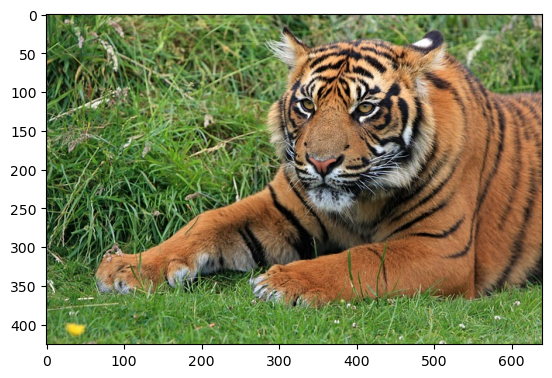

In [75]:
# Start by loading an image
im = cv2.imread('example_images_week2/tiger.jpg') # loads in BGR
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # convert to RGB
plt.imshow(im)

ValueError: 0 is not a valid value for vertical_axis; supported values are 'x', 'y', 'z'

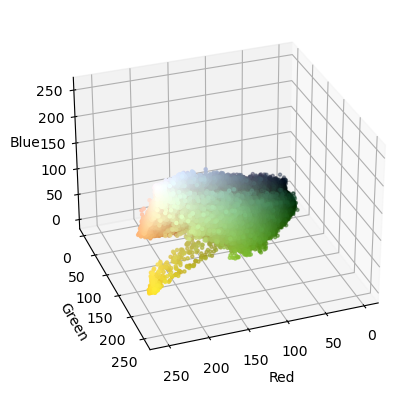

In [76]:
# Produce a 3D scatter plot of the colours in our image

# Import some additional modules for 3D scatter plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# Create array of pixel colours (in format and scaling needed for matplotlib scatter plot)
pixel_colours = im.reshape((im.shape[0]*im.shape[1], 3))
norm = colors.Normalize(vmin=-1.0,vmax=1.0)
norm.autoscale(pixel_colours)
pixel_colours = norm(pixel_colours).tolist()

# visualise the colours in a RGB colour space
R, G, B = cv2.split(im)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(R.flatten(), G.flatten(), B.flatten(), facecolors=pixel_colours, marker='.')
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.view_init(30,70,0) # (elevation, azimuth, roll): try adjusting to view from different perspectives

plt.tight_layout()


You can visualise the distribution of colours of all pixels in the image, but the RGB space is not great for distinguishing objects based on the way we perceive colours. We can convert our image into an alternative colour space (for example HSV) and visualise the points

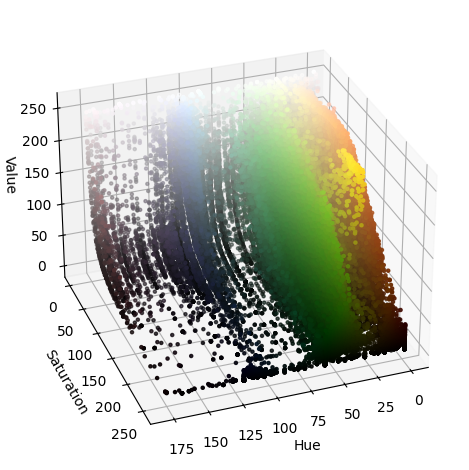

In [ ]:
# Scatter plot in HSV

# Convert to HSV
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

# visualise the colours in a RGB colour space
H, S, V = cv2.split(im_hsv)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(H.flatten(), S.flatten(), V.flatten(), facecolors=pixel_colours, marker='.')
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
axis.view_init(30,70,0) # (elevation, azimuth, roll): try adjusting to view from different perspectives

plt.tight_layout()

In the HSV colour space, pixels are easier to distiguish based on hue. We can now segment out objects based on colour by thresholding on different attributes of the colour space:

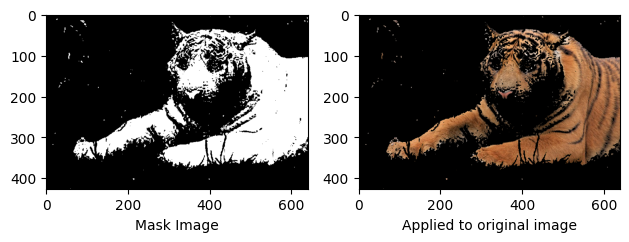

In [ ]:
# Segment out object based on colour using thresholding functions

# define lower and upper ranges of HSV (aim for orange of the tiger)
lower_hsv = (0,10,50)
upper_hsv = (15,255,255)

# Create mask of pixel inside range of lower and upper colours
mask = cv2.inRange(im_hsv, lower_hsv, upper_hsv) # (Image, lower_bound, upper_bound)

# Apply mask to visualise
im_temp = im.copy()
im_temp[(mask==0),:] = (0,0,0)
#im_temp = cv2.bitwise_and(im, im, mask=mask) # alternative way

# Display image and mask
plt.subplot(121)
plt.imshow(mask, 'gray')
plt.xlabel('Mask Image')

plt.subplot(122)
plt.imshow(im_temp)
plt.xlabel('Applied to original image')

plt.tight_layout()


We have managed to mask the orange parts of the tiger, but we are missing his white/black fur: a better strategy in this case (if aiming for the tiger) could be to "mask-out" the green background, and keep everything else outside of this range.

## Exercise 3: Colour-based Segmentation
Download and unzip the file 'example_images_week2.zip' (available on the canvas site). This contains images of a series of object for which you should try developing colour-based segmentation code that segments the different objects present in the image from the background. 

For reference, 'fluoro_cell.jpg' is a fluorescence microscope image of several human cells; the red, green and blue regions correspond to internal cytoskeletal proteins, external cytoskeletal proteins and the cell nucleus. Fluorescent chemical labels have been binded to these components in the cell using a laboratory process prior to taking the image, where the microscope uses different laser systems to excite the chemical labels during imaging.

- Visualise the colour distributions in each image in various colour spaces and determine the best segmentation thresholds you can for the different objects present in each of these images (i.e. different coloured skittles, tiger etc.)
- Experiment with the different colour spaces available and note when one space is more suited to a particular image and why this is the case (i.e. is the threshold axis-aligned with the object distinction you wish to make etc.)
- See if you can write a single function that segments both the body and legs of the beetles in one mask.


In [ ]:
# Write your code here, or in a separate python script
